In [16]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
try:
#     plt.style.use('belle2')
    plt.style.use('belle2_serif')
#     plt.style.use('belle2_modern')
except OSError:
    print("Please install belle2 matplotlib style")   
px = 1/plt.rcParams['figure.dpi']

from main.data_tools.extract_ntuples import get_pd, get_np
from main.draw_tools.decorations import b2helix, watermark

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
from main.draw_tools.stacking import make_dict_data, make_dict_data_list

In [27]:
#base_file_loc =  '/media/jykim/T7/storage/01_recon/trainv2_new_correct_data_sig_ext_zernike/'
#base_file_loc =  '/media/jykim/T7/storage/01_recon/trainv2_new_correct_data_sig_ext/'

base_filter = ' Pis_charge==1 && D0_M>1.67 && D0_M<2.06 && Pi0_Prob<0.8'
base_filter = ' Pis_charge==1 && D0_M>1.8 && D0_M<1.92 && Dstarp_CMS_p>2.42'
# base_filter = ' Pis_charge==1 && D0_M>1.83 && D0_M<1.90 '

tree = 'ref_phi'

variables=['D0_M','Dstarp_Q','Dstarp_CMS_p']
var = 'D0_M'

base_file_loc =  '/media/jykim/T7/storage/01_recon/trainv2new_ref_study/'

In [28]:

file_ccbar = []
file_uubar = []
file_ddbar = []
file_ssbar = []
file_charged = []
file_mixed = []
file_taupair = []

for i in range(0,1158):
    file_loc = base_file_loc + 'ccbar/recon_output_' + str(i).zfill(5) + '.root'
    file_ccbar.append(file_loc)
    
for i in range(0,1277):
    file_loc = base_file_loc + 'uubar/recon_output_' + str(i).zfill(5) + '.root'
    file_uubar.append(file_loc)
    
for i in range(0,321):
    file_loc = base_file_loc + 'ddbar/recon_output_' + str(i).zfill(5) + '.root'
    file_ddbar.append(file_loc)
for i in range(0,306):
    file_loc = base_file_loc + 'ssbar/recon_output_' + str(i).zfill(5) + '.root'
    file_ssbar.append(file_loc)
for i in range(0,602):
    file_loc = base_file_loc + 'charged/recon_output_' + str(i).zfill(5) + '.root'
    file_charged.append(file_loc)
for i in range(0,562):
    file_loc = base_file_loc + 'mixed/recon_output_' + str(i).zfill(5) + '.root'
    file_mixed.append(file_loc)
for i in range(0,410):
    file_loc = base_file_loc + 'taupair/recon_output_' + str(i).zfill(5) + '.root'
    file_taupair.append(file_loc)
    

base_filter = base_filter
varaiables = variables
tree=tree

pd_ccbar = get_pd(file=file_ccbar, tree=tree,base_filter=base_filter,variables=variables)
pd_uubar = get_pd(file=file_uubar, tree=tree,base_filter=base_filter,variables=variables)
pd_ddbar = get_pd(file=file_ddbar, tree=tree,base_filter=base_filter,variables=variables)
pd_ssbar = get_pd(file=file_ssbar, tree=tree,base_filter=base_filter,variables=variables)
pd_charged = get_pd(file=file_charged, tree=tree,base_filter=base_filter,variables=variables)
pd_mixed = get_pd(file=file_mixed, tree=tree,base_filter=base_filter,variables=variables)
pd_taupair = get_pd(file=file_taupair, tree=tree,base_filter=base_filter,variables=variables)





In [29]:
def Draw(var, xrange:tuple):
    global pd_ccbar
    global pd_uubar
    global pd_ddbar
    global pd_ssbar
    global pd_charged
    global pd_mixed
    global pd_taupair
    var = var
    labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']
    colors=b2helix(7)


    var = var
    data_list=dict()
    #     labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']
    mixed_bkg = {var : pd_mixed[var] }
    charged_bkg = {var : pd_charged[var] }
    ccbar_bkg = {var : pd_ccbar[var] }
    uubar_bkg = {var : pd_uubar[var] }
    ddbar_bkg = {var : pd_ddbar[var] }
    ssbar_bkg = {var : pd_ssbar[var] }
    taupair_bkg = {var : pd_taupair[var] }

    #print(mixed_bkg)
    #     data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
    data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  

    #     for labeling in labels:
    xrange=xrange
    xbins = np.linspace(*xrange,51)
    plt.hist(data_list[var], bins=xbins, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black')

    #     plt.hist(pd_phigamma_ccbar_signal[var],bins=xbins,histtype='step',color='r',label='signal')

    ax = plt.gca()

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width , box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
    plt.legend()

    #     DRAW(pd_Dtokshortpi0, cut)

    watermark(t="",logo="MC15ri")
    ax=plt.gca()
    #     ax.set_title(r'$D^0 \to K^0_S \pi^0$ sample' )

    n, xe = np.histogram(ccbar_bkg[var], bins=50, range=xrange)

    ax.set_xlim(*xrange)
    #     ax.set_ylim(0,6000)

    plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
    width = xe[1]-xe[0]
    plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');
    plt.show()
    plt.clf()

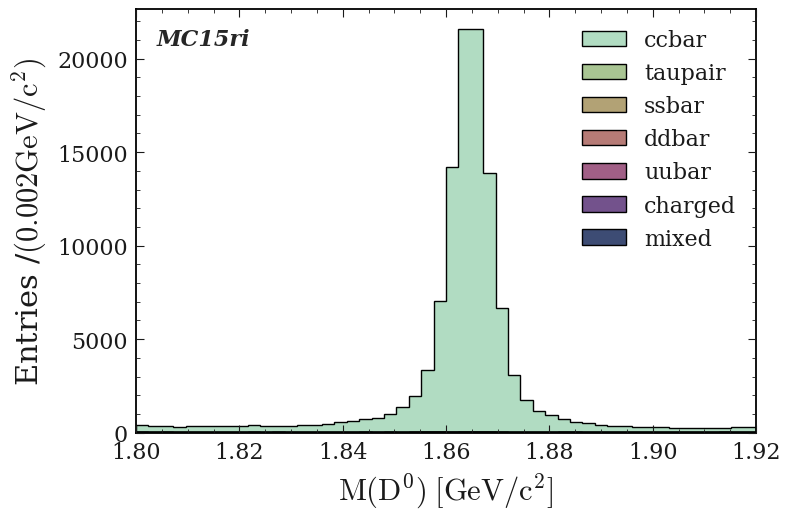

<Figure size 800x550 with 0 Axes>

In [30]:
Draw('D0_M',(1.8,1.92))

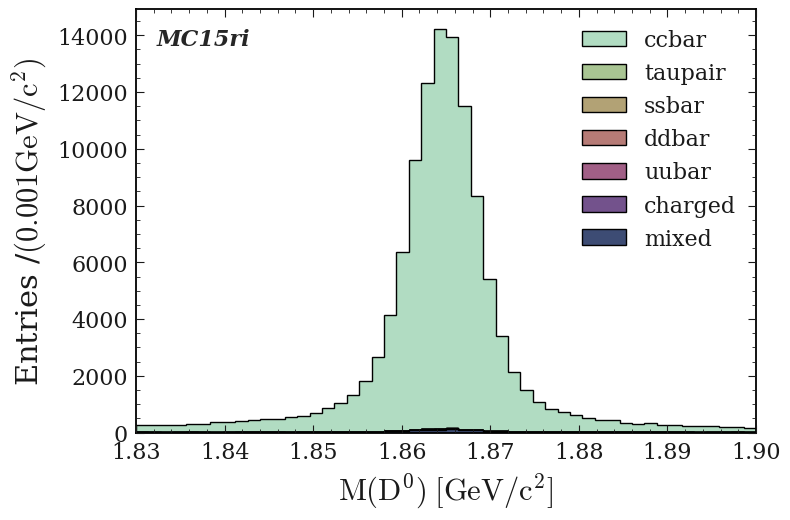

<Figure size 800x550 with 0 Axes>

In [22]:
Draw('D0_M',(1.83,1.90))

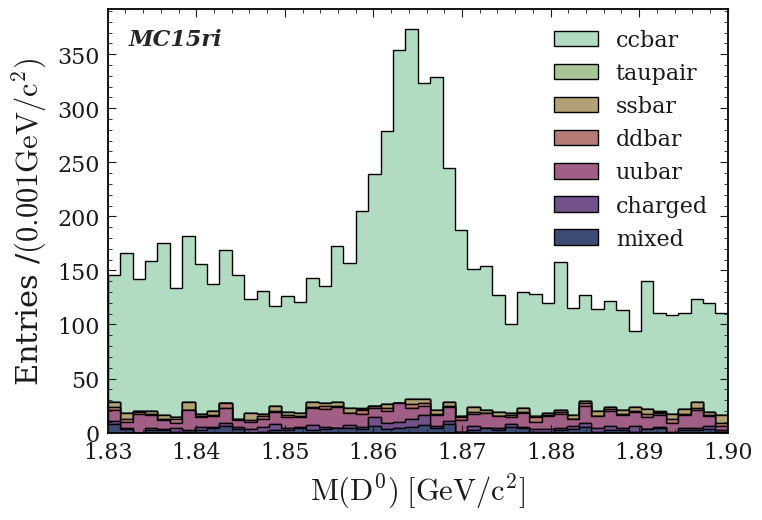

<Figure size 800x550 with 0 Axes>

In [26]:
Draw('D0_M',(1.83,1.90))

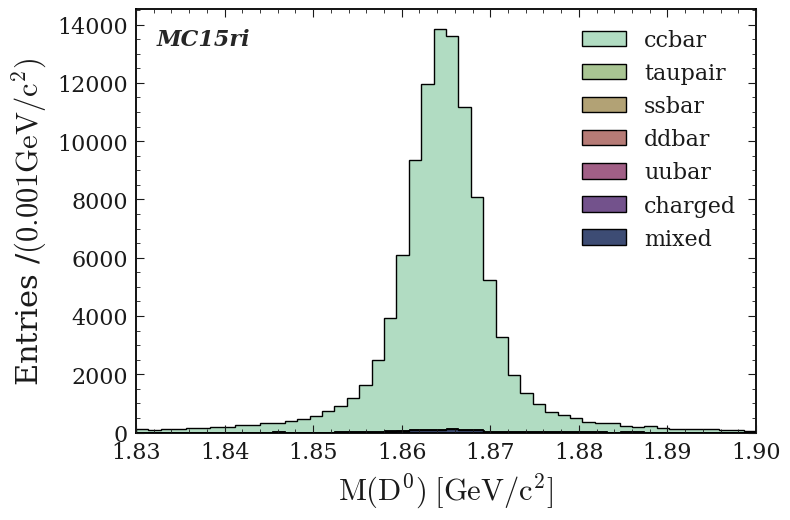

<Figure size 800x550 with 0 Axes>

In [30]:
Draw('D0_M',(1.83,1.90))

In [13]:
#base_file_loc =  '/media/jykim/T7/storage/01_recon/trainv2_new_correct_data_sig_ext_zernike/'
#base_file_loc =  '/media/jykim/T7/storage/01_recon/trainv2_new_correct_data_sig_ext/'

base_filter = ' Pis_charge==1 && D0_M>1.67 && D0_M<2.06 && Pi0_Prob<0.8'
base_filter = ' Pis_charge==1 && D0_M>1.67 && D0_M<2.06 '
base_filter = ' Pis_charge==1 && D0_M>1.78 && D0_M<1.94 '

tree = 'ref_antiKstar'

variables=['D0_M','Dstarp_Q','Dstarp_CMS_p']
var = 'D0_M'

base_file_loc =  '/media/jykim/T7/storage/01_recon/trainv2new_ref_study/'

In [14]:

file_ccbar = []
file_uubar = []
file_ddbar = []
file_ssbar = []
file_charged = []
file_mixed = []
file_taupair = []

for i in range(0,1158):
    file_loc = base_file_loc + 'ccbar/recon_output_' + str(i).zfill(5) + '.root'
    file_ccbar.append(file_loc)
    
for i in range(0,1277):
    file_loc = base_file_loc + 'uubar/recon_output_' + str(i).zfill(5) + '.root'
    file_uubar.append(file_loc)
    
for i in range(0,321):
    file_loc = base_file_loc + 'ddbar/recon_output_' + str(i).zfill(5) + '.root'
    file_ddbar.append(file_loc)
for i in range(0,306):
    file_loc = base_file_loc + 'ssbar/recon_output_' + str(i).zfill(5) + '.root'
    file_ssbar.append(file_loc)
for i in range(0,602):
    file_loc = base_file_loc + 'charged/recon_output_' + str(i).zfill(5) + '.root'
    file_charged.append(file_loc)
for i in range(0,562):
    file_loc = base_file_loc + 'mixed/recon_output_' + str(i).zfill(5) + '.root'
    file_mixed.append(file_loc)
for i in range(0,410):
    file_loc = base_file_loc + 'taupair/recon_output_' + str(i).zfill(5) + '.root'
    file_taupair.append(file_loc)
    

base_filter = base_filter
varaiables = variables
tree=tree

pd_ccbar = get_pd(file=file_ccbar, tree=tree,base_filter=base_filter,variables=variables)
pd_uubar = get_pd(file=file_uubar, tree=tree,base_filter=base_filter,variables=variables)
pd_ddbar = get_pd(file=file_ddbar, tree=tree,base_filter=base_filter,variables=variables)
pd_ssbar = get_pd(file=file_ssbar, tree=tree,base_filter=base_filter,variables=variables)
pd_charged = get_pd(file=file_charged, tree=tree,base_filter=base_filter,variables=variables)
pd_mixed = get_pd(file=file_mixed, tree=tree,base_filter=base_filter,variables=variables)
pd_taupair = get_pd(file=file_taupair, tree=tree,base_filter=base_filter,variables=variables)





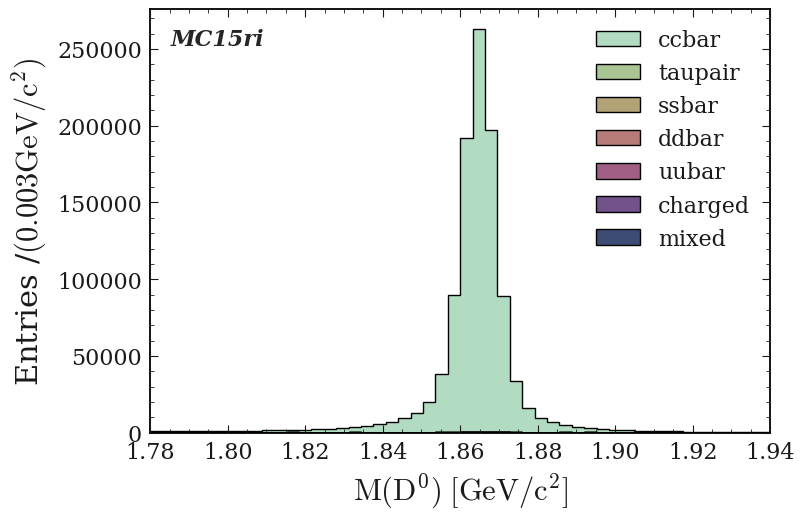

<Figure size 800x550 with 0 Axes>

In [15]:
Draw('D0_M',(1.78,1.94))

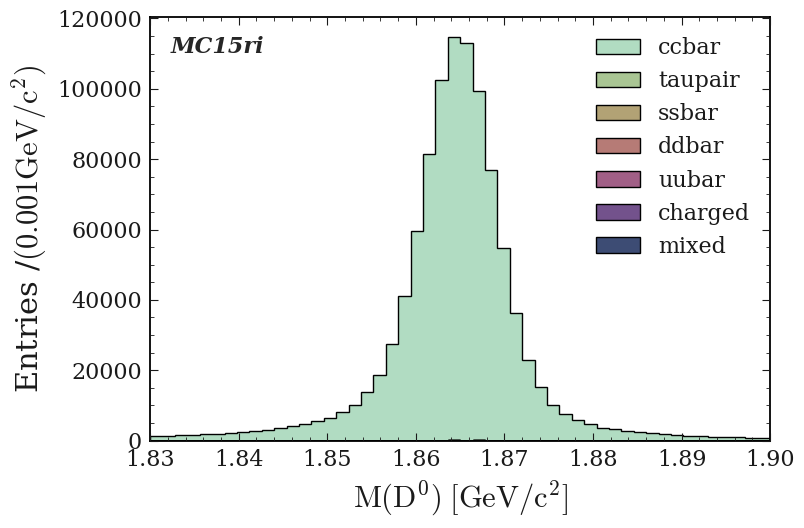

<Figure size 800x550 with 0 Axes>

In [33]:
Draw('D0_M',(1.83,1.90))

In [36]:
#base_file_loc =  '/media/jykim/T7/storage/01_recon/trainv2_new_correct_data_sig_ext_zernike/'
#base_file_loc =  '/media/jykim/T7/storage/01_recon/trainv2_new_correct_data_sig_ext/'

base_filter = ' Pis_charge==1 && D0_M>1.67 && D0_M<2.06 && Pi0_Prob<0.8'
base_filter = ' Pis_charge==1 && D0_M>1.82 && D0_M<1.94 && Dstarp_CMS_p>2.7'
# base_filter = ' Pis_charge==1 && D0_M>1.83 && D0_M<1.90 && Dstarp_isSignal!=1'

tree = 'ref_rho'

variables=['D0_M','Dstarp_Q','Dstarp_CMS_p']
var = 'D0_M'

base_file_loc =  '/media/jykim/T7/storage/01_recon/trainv2new_ref_study/'

In [37]:

file_ccbar = []
file_uubar = []
file_ddbar = []
file_ssbar = []
file_charged = []
file_mixed = []
file_taupair = []

for i in range(0,1158):
    file_loc = base_file_loc + 'ccbar/recon_output_' + str(i).zfill(5) + '.root'
    file_ccbar.append(file_loc)
    
for i in range(0,1277):
    file_loc = base_file_loc + 'uubar/recon_output_' + str(i).zfill(5) + '.root'
    file_uubar.append(file_loc)
    
for i in range(0,321):
    file_loc = base_file_loc + 'ddbar/recon_output_' + str(i).zfill(5) + '.root'
    file_ddbar.append(file_loc)
for i in range(0,306):
    file_loc = base_file_loc + 'ssbar/recon_output_' + str(i).zfill(5) + '.root'
    file_ssbar.append(file_loc)
for i in range(0,602):
    file_loc = base_file_loc + 'charged/recon_output_' + str(i).zfill(5) + '.root'
    file_charged.append(file_loc)
for i in range(0,562):
    file_loc = base_file_loc + 'mixed/recon_output_' + str(i).zfill(5) + '.root'
    file_mixed.append(file_loc)
for i in range(0,410):
    file_loc = base_file_loc + 'taupair/recon_output_' + str(i).zfill(5) + '.root'
    file_taupair.append(file_loc)
    

base_filter = base_filter
varaiables = variables
tree=tree

pd_ccbar = get_pd(file=file_ccbar, tree=tree,base_filter=base_filter,variables=variables)
pd_uubar = get_pd(file=file_uubar, tree=tree,base_filter=base_filter,variables=variables)
pd_ddbar = get_pd(file=file_ddbar, tree=tree,base_filter=base_filter,variables=variables)
pd_ssbar = get_pd(file=file_ssbar, tree=tree,base_filter=base_filter,variables=variables)
pd_charged = get_pd(file=file_charged, tree=tree,base_filter=base_filter,variables=variables)
pd_mixed = get_pd(file=file_mixed, tree=tree,base_filter=base_filter,variables=variables)
pd_taupair = get_pd(file=file_taupair, tree=tree,base_filter=base_filter,variables=variables)





runtime_error: string ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void>::GetColumnType(basic_string_view<char,char_traits<char> > column) =>
    runtime_error: Column "D0_M" is not in a dataset and is not a custom column been defined.

Error in <TFile::TFile>: file /media/jykim/T7/storage/01_recon/trainv2new_ref_study/ccbar/recon_output_00000.root does not exist
Error in <TFile::TFile>: file /media/jykim/T7/storage/01_recon/trainv2new_ref_study/ccbar/recon_output_00001.root does not exist
Error in <TFile::TFile>: file /media/jykim/T7/storage/01_recon/trainv2new_ref_study/ccbar/recon_output_00002.root does not exist
Error in <TFile::TFile>: file /media/jykim/T7/storage/01_recon/trainv2new_ref_study/ccbar/recon_output_00003.root does not exist
Error in <TFile::TFile>: file /media/jykim/T7/storage/01_recon/trainv2new_ref_study/ccbar/recon_output_00004.root does not exist
Error in <TFile::TFile>: file /media/jykim/T7/storage/01_recon/trainv2new_ref_study/ccbar/recon_output_00005.root does not exist
Error in <TFile::TFile>: file /media/jykim/T7/storage/01_recon/trainv2new_ref_study/ccbar/recon_output_00006.root does not exist
Error in <TFile::TFile>: file /media/jykim/T7/storage/01_recon/trainv2new_ref_study/ccbar/recon_o

In [ ]:
Draw('D0_M',(1.82,1.94))

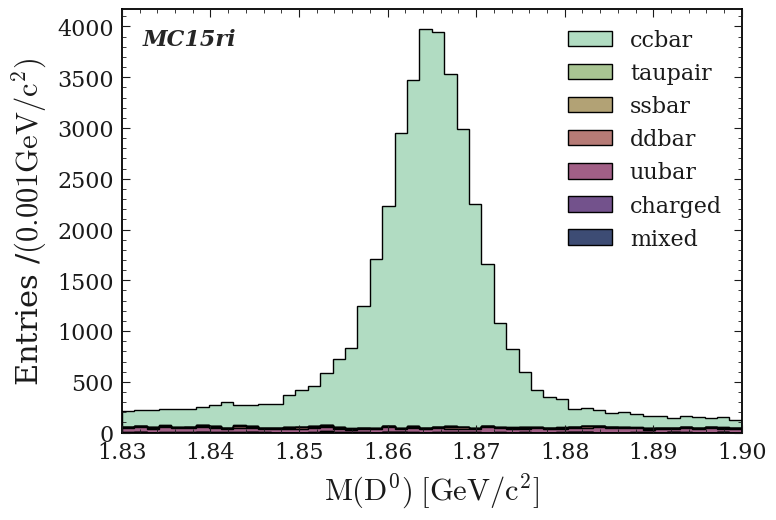

<Figure size 800x550 with 0 Axes>

In [40]:
Draw('D0_M',(1.83,1.90))

In [53]:
#base_file_loc =  '/media/jykim/T7/storage/01_recon/trainv2_new_correct_data_sig_ext_zernike/'
#base_file_loc =  '/media/jykim/T7/storage/01_recon/trainv2_new_correct_data_sig_ext/'

base_filter = ' Pis_charge==1 && D0_M>1.67 && D0_M<2.06 && Pi0_Prob<0.8'
base_filter = ' Pis_charge==1 && D0_M>1.67 && D0_M<2.06 '
base_filter = ' ref_omega_rank_Dstp==1 && D0_M>1.67 && D0_M< 2.06 && Dstarp_isSignal!=1'

tree = 'ref_omega'

variables=['D0_M','Dstarp_Q','Dstarp_CMS_p']
var = 'D0_M'

base_file_loc =  '/media/jykim/T7/storage/01_recon/trainv2new_ref_study/'

In [54]:

file_ccbar = []
file_uubar = []
file_ddbar = []
file_ssbar = []
file_charged = []
file_mixed = []
file_taupair = []

for i in range(0,1158):
    file_loc = base_file_loc + 'ccbar/recon_output_' + str(i).zfill(5) + '.root'
    file_ccbar.append(file_loc)
    
for i in range(0,1277):
    file_loc = base_file_loc + 'uubar/recon_output_' + str(i).zfill(5) + '.root'
    file_uubar.append(file_loc)
    
for i in range(0,321):
    file_loc = base_file_loc + 'ddbar/recon_output_' + str(i).zfill(5) + '.root'
    file_ddbar.append(file_loc)
for i in range(0,306):
    file_loc = base_file_loc + 'ssbar/recon_output_' + str(i).zfill(5) + '.root'
    file_ssbar.append(file_loc)
for i in range(0,602):
    file_loc = base_file_loc + 'charged/recon_output_' + str(i).zfill(5) + '.root'
    file_charged.append(file_loc)
for i in range(0,562):
    file_loc = base_file_loc + 'mixed/recon_output_' + str(i).zfill(5) + '.root'
    file_mixed.append(file_loc)
for i in range(0,410):
    file_loc = base_file_loc + 'taupair/recon_output_' + str(i).zfill(5) + '.root'
    file_taupair.append(file_loc)
    

base_filter = base_filter
varaiables = variables
tree=tree

pd_ccbar = get_pd(file=file_ccbar, tree=tree,base_filter=base_filter,variables=variables)
pd_uubar = get_pd(file=file_uubar, tree=tree,base_filter=base_filter,variables=variables)
pd_ddbar = get_pd(file=file_ddbar, tree=tree,base_filter=base_filter,variables=variables)
pd_ssbar = get_pd(file=file_ssbar, tree=tree,base_filter=base_filter,variables=variables)
pd_charged = get_pd(file=file_charged, tree=tree,base_filter=base_filter,variables=variables)
pd_mixed = get_pd(file=file_mixed, tree=tree,base_filter=base_filter,variables=variables)
pd_taupair = get_pd(file=file_taupair, tree=tree,base_filter=base_filter,variables=variables)





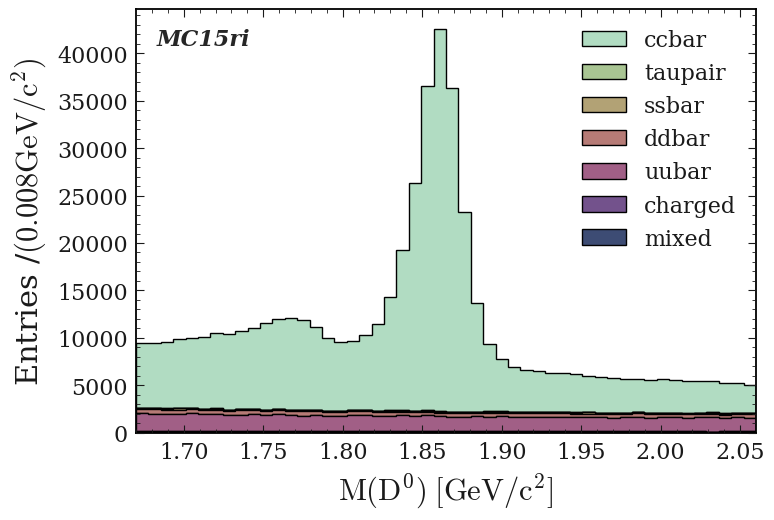

<Figure size 800x550 with 0 Axes>

In [52]:
Draw('D0_M',(1.67,2.06))

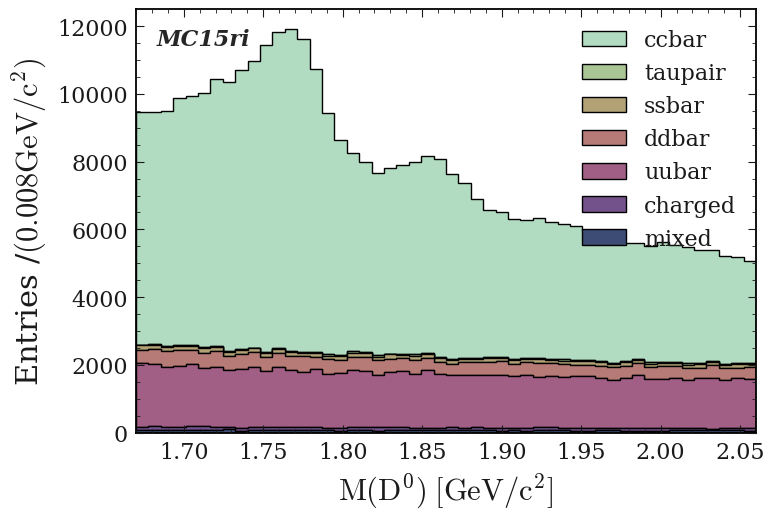

<Figure size 800x550 with 0 Axes>

In [55]:
Draw('D0_M',(1.67,2.06))